# 使用决策树进行乳腺癌诊断  
- tree.DecisionTreeClassifier

In [1]:
import numpy as np
from sklearn import datasets, metrics, model_selection
from sklearn import tree

## 数据集：威斯康星乳腺癌数据集

In [2]:
bc_data = datasets.load_breast_cancer()
print(bc_data.data.shape)  # (569, 30)
print(bc_data.feature_names.shape)
print(bc_data.target_names)  # ['malignant' 'benign']

(569, 30)
(30,)
['malignant' 'benign']


In [3]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    bc_data.data, bc_data.target, test_size=0.2, random_state=42
)

In [4]:
dtc = tree.DecisionTreeClassifier()

In [5]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
y_pred = dtc.predict(x_test)
# print(y_pred)
# print(y_test)
# print(y_pred == y_test)

In [7]:
# score: 准确率
print(dtc.score(x_train, y_train))
print(dtc.score(x_test, y_test))

1.0
0.9385964912280702


In [ ]:
# 决策树可视化
import pydotplus

dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=bc_data.feature_names, class_names=bc_data.target_names)
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png("breast_cancer.png")

![jupyter](./breast_cancer.png)

[0.         0.02766931 0.         0.         0.         0.
 0.         0.69141955 0.         0.         0.         0.
 0.         0.01198257 0.00123678 0.         0.         0.01593081
 0.         0.02483024 0.05229927 0.04018466 0.05149396 0.
 0.00923319 0.         0.         0.07371964 0.         0.        ]


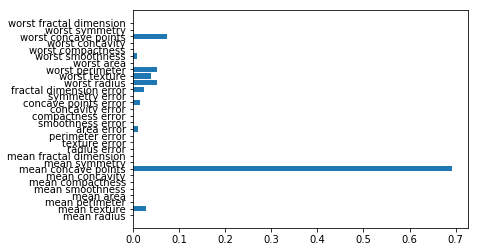

In [8]:
# 特征重要性评估
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure(figsize=(16, 12))

print(dtc.feature_importances_)
plt.barh(range(30), dtc.feature_importances_, align='center', tick_label=bc_data.feature_names)
plt.show()

# 构建决策树
## 测试集准确率不高，构建不同决策树进行对比
- max_depth
- min_sample

In [14]:
max_depths = np.array([1,2,3,5,7,8,9,11])

train_score = []
test_score = []


In [15]:
for d in max_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=d)
    dtc.fit(x_train, y_train)
    train_score.append(dtc.score(x_train, y_train))
    test_score.append(dtc.score(x_test, y_test))

In [16]:
print(train_score)
print(test_score)

[0.9208791208791208, 0.9296703296703297, 0.978021978021978, 0.9956043956043956, 1.0, 1.0, 1.0, 1.0]
[0.8947368421052632, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315]


In [17]:
plt.style.use("ggplot")

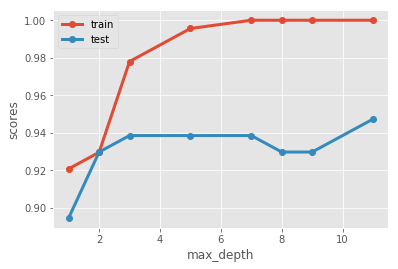

In [18]:
plt.plot(max_depths,train_score,'o-',linewidth=3,label='train')
plt.plot(max_depths,test_score,'o-',linewidth=3,label='test')
plt.xlabel('max_depth')
plt.ylabel('scores')
plt.legend()

In [12]:
min_samples = np.array([2,4,6,8,16,32])

train_score = []
test_score = []

In [13]:
for d in min_samples:
    dtc = tree.DecisionTreeClassifier(min_samples_leaf=d)
    dtc.fit(x_train, y_train)
    train_score.append(dtc.score(x_train, y_train))
    test_score.append(dtc.score(x_test, y_test))

In [16]:
print(train_score)
print(test_score)

[0.9912087912087912, 0.9802197802197802, 0.9758241758241758, 0.9714285714285714, 0.9538461538461539, 0.9230769230769231]
[0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9122807017543859]


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

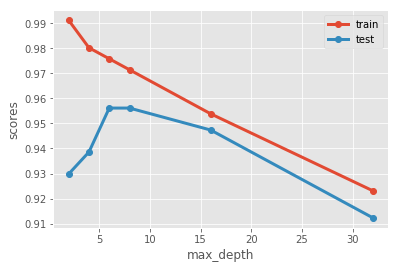

In [15]:
plt.plot(min_samples,train_score,'o-',linewidth=3,label='train')
plt.plot(min_samples,test_score,'o-',linewidth=3,label='test')
plt.xlabel('max_depth')
plt.ylabel('scores')
plt.legend()